In [1]:
# PANDAS - DATAFRAME BASED OPERATIONS LIKE IMPORT/EXPORT, MERGE, CONCAT,
# RESHAPE, PLOT, ETC. DATAFRAME IS BY DEFAULT ROWS ARE OBSERVATIONS AND
# COLUMNS ARE VARIABLES. IN EXCEL WE CALL DATAFRAME AS DATA TABLE

# MATPLOTLIB.PYPLOT - DATA VIZUALIZATION LIBRARY WITH PARTICULAR UTILITY IN
# PLOT WINDOW SIZING, SUBPLOTS, AXES CHANGES, ETC.

# NUMPY - ARRAY BASED OPERATIONS. ARRAYS OR LISTS ARE FUNDAMENTAL DATASTRUCTURE
# OF PYTHON. THEY START AND END WITH [] OR SQUARE BRACKETS AND ELEMENTS 
# SEPERATED BY COMMA. ARRAYS ARE MUTABLE(APPEND), UNORDERED, AND ALLOW 
# DUPLICATES.
# SUBPACKAGES IN NUMPY
# SCIPY.STATS - STATISTICAL ANALYSIS
# STATSMODEL - IOT OR TIME SERIES ANALYSIS
# SKLEARN - MACHINE LEARNING 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd "C:\Users\rajes\Desktop\Datasets"

C:\Users\rajes\Desktop\Datasets


In [4]:
cardata=pd.read_csv("Car details v3 torque corrected.csv")

In [5]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7640 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [6]:
# Data preprocessing - Missing Value Treatment - Very critical because the
# model performance is effected by missing values.
# Missing values must be imputed.
# If there are more than 70% missing values in a variable, impute with word
# "missing" or "NotAvaialable"
# If there are less than 70% missing values in a variabe & if variable is
# Numeric - Mean or Median imputation
# Non Numeric or Categorical - Mode or most_frequent
# All the methods above are Manual Methods which do not consider the impact of
# other variables on the  missing value.

# Algorithm Based imputation which consider the impact of other variables on
# missing value during the imputation process.
# 1) MICE - Multivariate Imputation using Chained Equations. Simultaneously
# impute both numeric and non numeric variables.
# 2) KNN Imputer - K Nearest Neighbors algorithm based imputer works only on
# Numeric data
# 3) Probabilistic PCA - Based on Principal Component Analysis imputes both
# numeric and non numeric variables

In [7]:
cardata.isnull().sum().sort_values(ascending=False)
# isnull() - to identify missing values or NA
# sum() - total missing values
# sort_values(ascending=False) - sort in descending order

torque           488
mileage          221
engine           221
seats            221
max_power        215
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [8]:
cardata.shape # Number of Rows and Number of Columns

(8128, 13)

In [9]:
# Percentage Missing Values in each Variable
cardata.isnull().sum().sort_values(ascending=False)/cardata.shape[0]*100

torque           6.003937
mileage          2.718996
engine           2.718996
seats            2.718996
max_power        2.645177
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
dtype: float64

In [10]:
cardata[['torque','mileage','max_power','engine','seats']].head()

,torque,mileage,max_power,engine,seats
0,2000,23.40,74,1248.0,5.0
1,2500,21.14,103.52,1498.0,5.0
2,2700,17.70,78,1497.0,5.0
3,NaN,23.00,90,1396.0,5.0
4,4500,16.10,88.2,1298.0,5.0


In [11]:
# torque is in object form
cardata.torque=pd.to_numeric(cardata.torque,errors="coerce")
# errors=coerce will impute NA when data type cannot be changed

In [12]:
# Median Imputation
cardata.torque=cardata.torque.fillna(cardata.torque.median())

In [13]:
# max_power in object form
cardata.max_power=pd.to_numeric(cardata.max_power,errors="coerce")

In [14]:
# mean Imputation
cardata.max_power=cardata.max_power.fillna(cardata.max_power.median())

In [15]:
# mean Imputation
cardata.mileage=cardata.mileage.fillna(cardata.mileage.mean())

In [16]:
cardata.engine=cardata.engine.fillna(cardata.engine.median())

In [17]:
# Mode or most_frequent imputation
cardata.seats=cardata.seats.fillna(cardata.seats.value_counts().idxmax())

In [18]:
cardata.columns # Dependent Variable(y) - selling_price
# Business problem or Research Objective is Predict selling_price of a car
# based on given variables.
# Numeric Variables and Object Variables

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [19]:
cardata.fuel.value_counts() # Frequency Counts

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [20]:
cardata.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [21]:
cardata.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [22]:
# Cross Tabulation - Frequency Table of 2 Non Numeric variables
pd.crosstab(cardata.owner,cardata.fuel)

fuel,CNG,Diesel,LPG,Petrol
owner,,,,
First Owner,34,2804,17,2434
Fourth & Above Owner,2,88,2,82
Second Owner,18,1223,14,850
Test Drive Car,0,1,0,4
Third Owner,3,286,5,261


In [23]:
pd.crosstab(cardata.owner,cardata.seller_type)

seller_type,Dealer,Individual,Trustmark Dealer
owner,,,
First Owner,1018,4068,203
Fourth & Above Owner,0,174,0
Second Owner,99,1973,33
Test Drive Car,5,0,0
Third Owner,4,551,0


In [24]:
# Numeric Variables - Descriptive Statistics must be done
# Measures of central tendency(mid point) - mean,median, mode
# Measures of Dispersion(scattering of observations around mean) - variance,
# standard deviation
# Measures of Location - Quartiles, Percentiles, Deciles
# Measures of Asymmetry(closeness to Normal Distribution) - Skewness & Kurtosis

In [25]:
np.round(cardata[['selling_price', 'km_driven','mileage', 'engine', 'max_power',
         'torque']].describe(),2)
# Count/N, Min, Max, Mean, Q1(25%), Q2(50%) or Median, Q3(75%), Std Deviation
# mean and median must be closer, else mean is distorted by large or small
# values
# Std Deviation is high means skewness, outliers in data

,selling_price,km_driven,mileage,engine,max_power,torque
count,8128.00,8128.00,8128.00,8128.0,8128.00,8128.00
mean,638271.81,69819.51,19.42,1452.9,91.26,3084.48
std,806253.40,56550.55,3.98,498.2,35.38,895.20
min,29999.00,1.00,0.00,624.0,0.00,500.00
25%,254999.00,35000.00,16.80,1197.0,68.10,2500.00
50%,450000.00,60000.00,19.42,1248.0,82.00,3000.00
75%,675000.00,98000.00,22.28,1582.0,101.25,4000.00
max,10000000.00,2360457.00,42.00,3604.0,400.00,21800.00


In [26]:
cardata[['selling_price', 'km_driven','mileage', 'engine', 'max_power',
         'torque']].skew()
# Positive Skewness - Peak of curve is on Left Side
# Negative Skewness - Peak of Curve is on Right Side

selling_price     4.193533
km_driven        11.170910
mileage          -0.144647
engine            1.175306
max_power         1.659558
torque            1.318232
dtype: float64

In [27]:
cardata[['selling_price', 'km_driven','mileage', 'engine', 'max_power',
         'torque']].kurt()
# Positive Kurtosis - Tall and Narrow peak
# Negative Kurtosie - Flat and Wide peak

selling_price     21.081289
km_driven        384.097414
mileage            0.669596
engine             0.854763
max_power          3.990877
torque            22.389762
dtype: float64

In [28]:
# Data Vizualization - 3 most important plots in Machine Learning are
# Histogram - Based on Frequency Distribution Table. ClassInterval - Frequency
# Bar plot of Frequency Distribution Table is Histogram

# Boxplot - Based on Quartiles. Q1, Q2 or Median, Q3 and Inter Quartile Range
# IQR=Q3-Q1. Boxplot identifies outliers using the following formulas
# Minimum - Q1-1.5*IQR     & Maximum-Q3+1.5*IQR

# Density Curve - Based on Standard Normal Distribution Scores

# All 3 plots are done only on Numeric Variables. Univariate Plots done on
# Single variable.

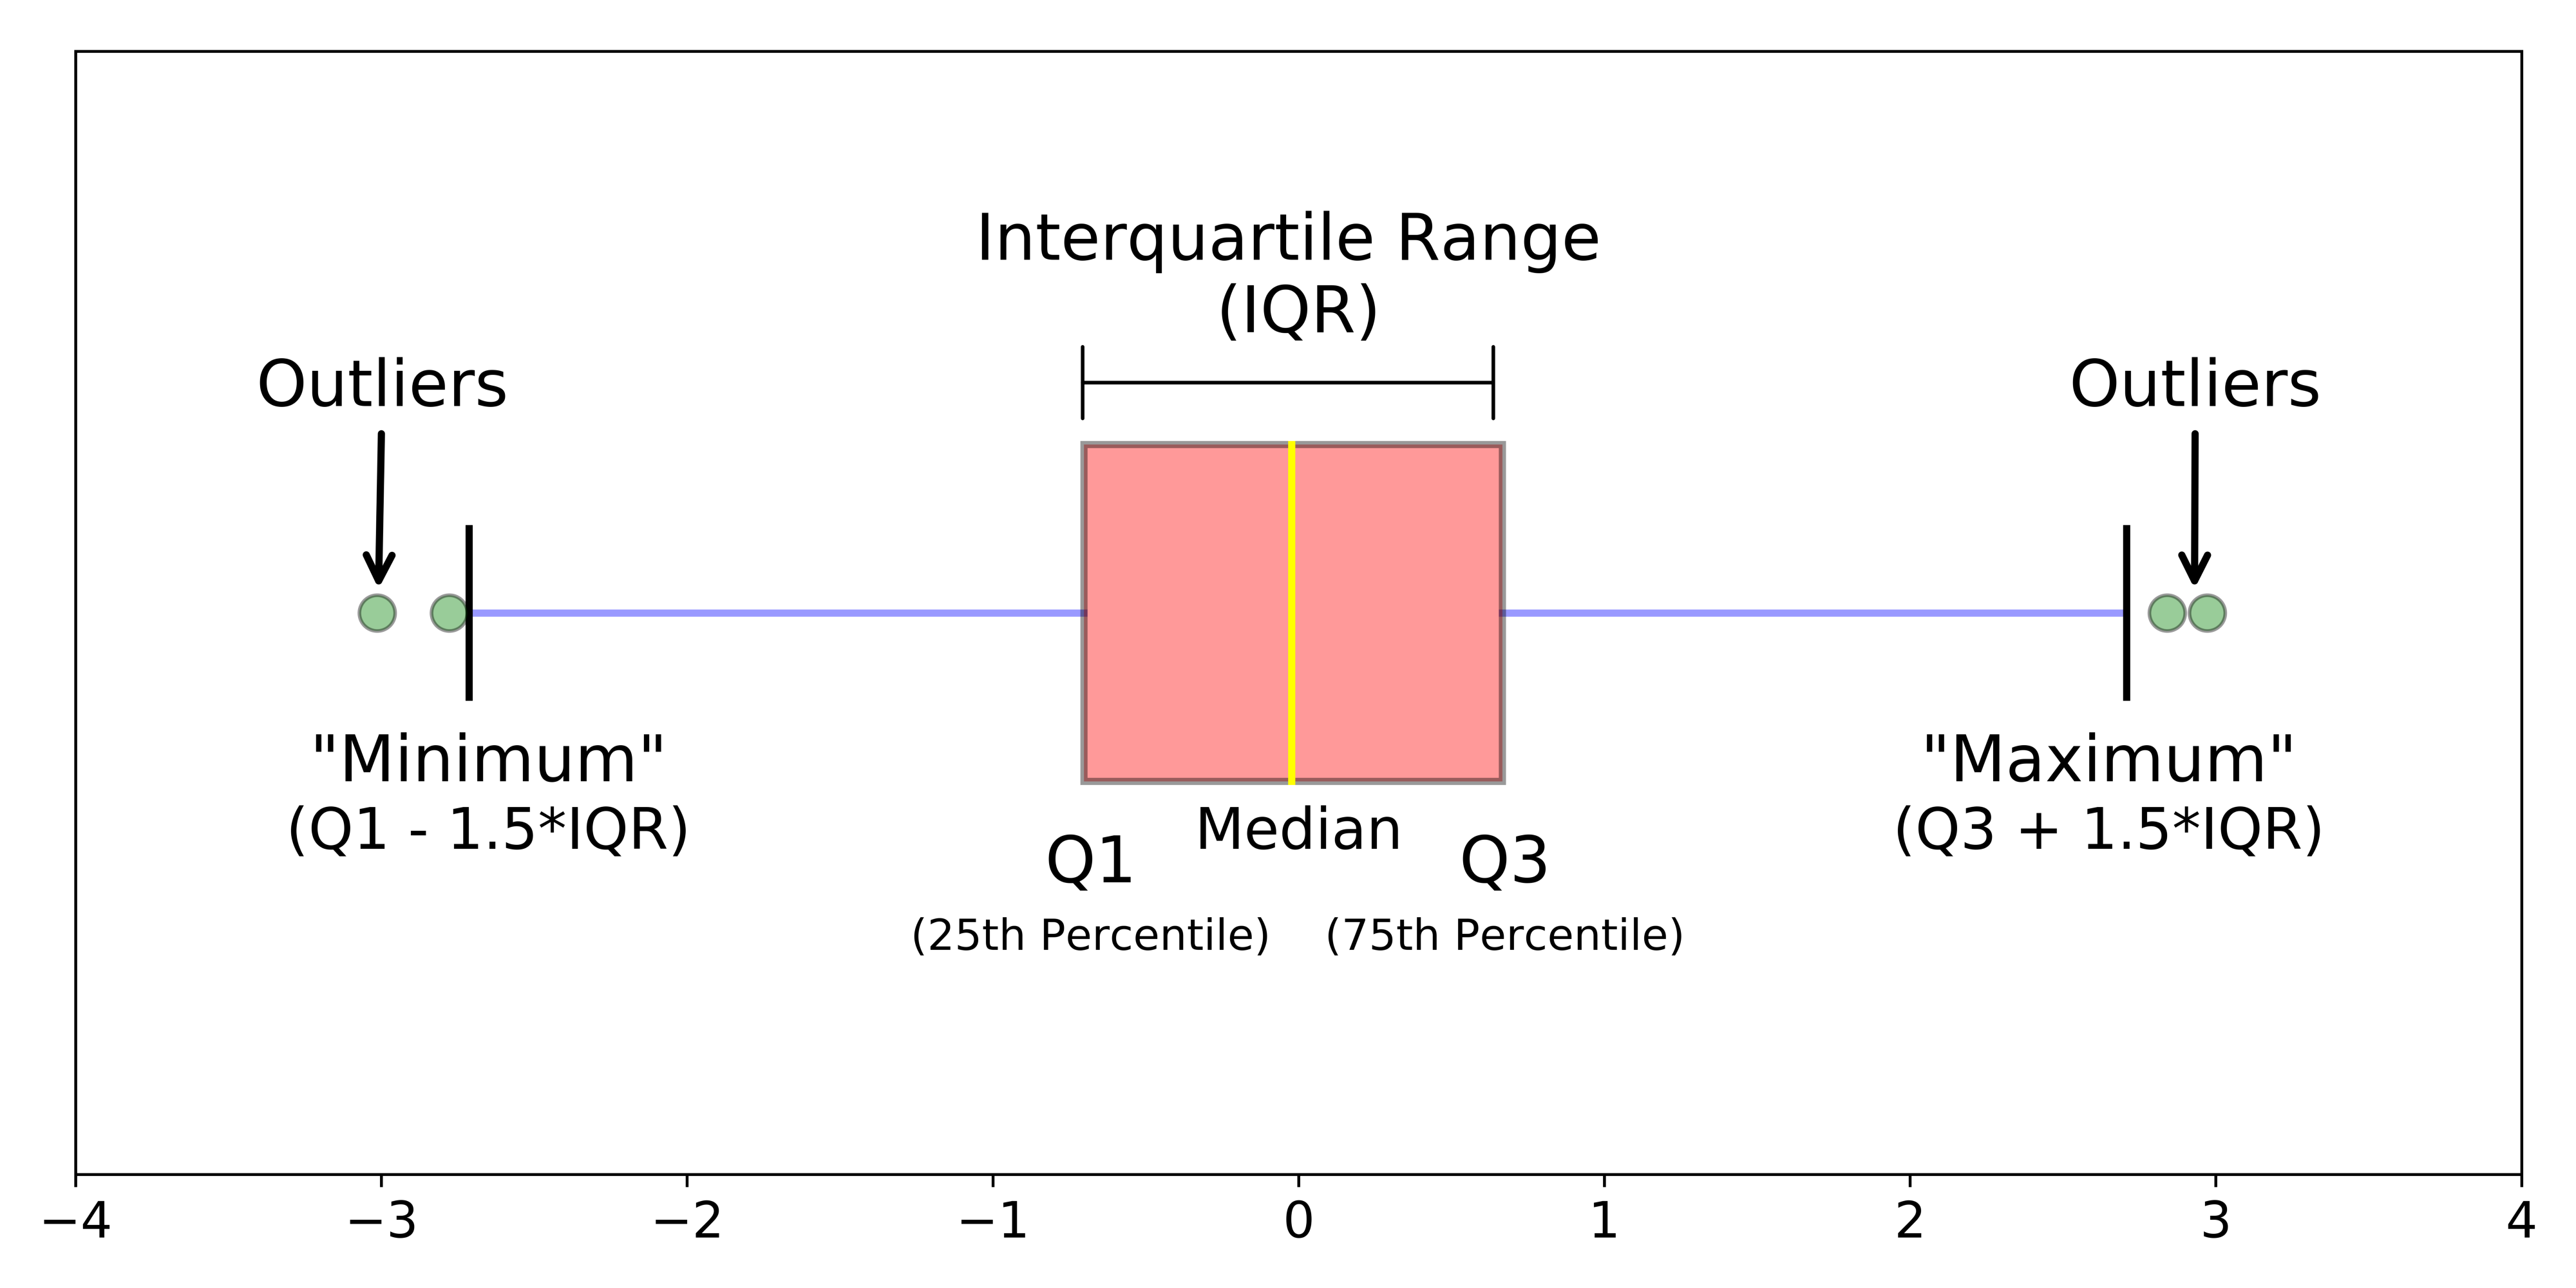

<AxesSubplot: ylabel='Frequency'>

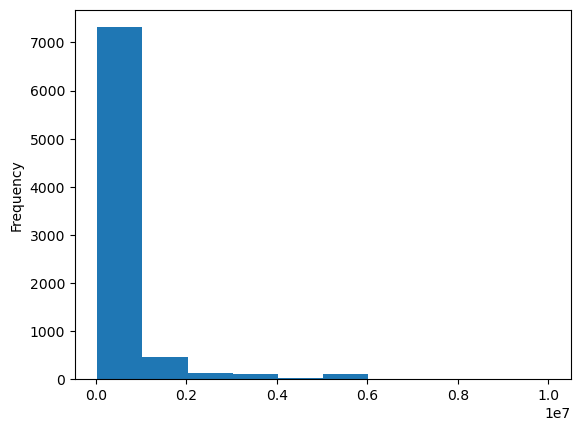

In [29]:
cardata.selling_price.plot(kind='hist')

<AxesSubplot: >

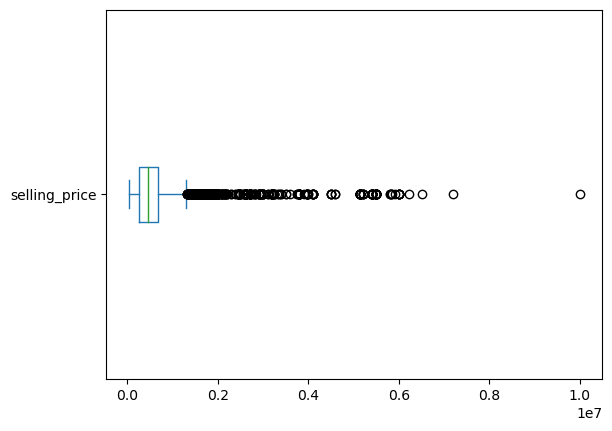

In [30]:
cardata.selling_price.plot(kind='box',vert=False)

<AxesSubplot: ylabel='Density'>

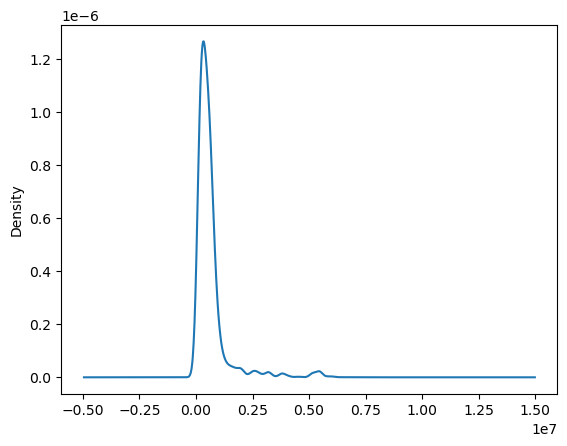

In [31]:
cardata.selling_price.plot(kind='density')

In [33]:
# Data preprocessing - Data Transformation
# Dependent Variable(y)
# Positive Skewness - Logarthmic Transformation or Square Root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation 

# Independent variables (X's)
# When Data is in multiple mathematical units i.e, tens,hundreds,thousands,
# lakhs, etc. Scaling must be done.
# a) Standard Scaler or Standardization or Z Score = (x-mean)/std deviation
# Standard Scaler generates both positive and negative values as some observations
# will be above mean and some below mean. Most preferred scaler in Regression.
# b) Min-Max Scaler or Normalization - (X-Xmin)/(Xmax-Xmin) scales all the
# observations in the range of 0 to 1 without negative values. Used when
# there is complex mathematical calculations like in Neural Networks and
# Image processing
# c) Robust Scaler - (X-Q2)/(Q3-Q1) uses Quartiles to scale data and this
# to be used when there are large scale outliers in the independent variables.

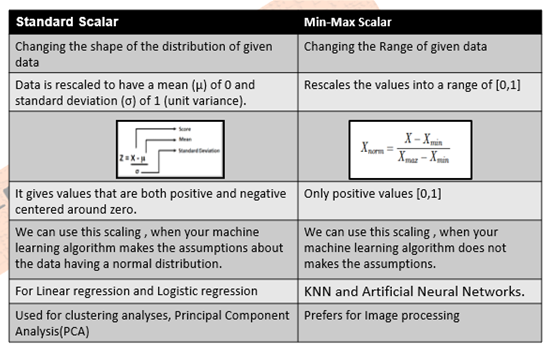

<AxesSubplot: >

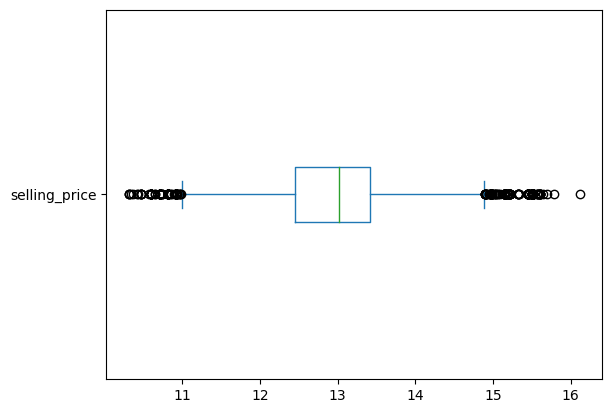

In [34]:
# Logarthmic Transformation - Positive Skewness
np.log(cardata.selling_price).plot(kind='box',vert=False)

AxesSubplot(0.125,0.11;0.775x0.77)
skewness: 11.170909783549087


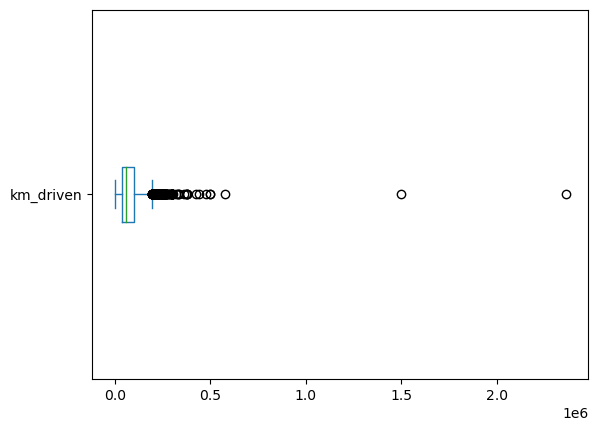

In [36]:
print(cardata.km_driven.plot(kind='box',vert=False))
print("skewness:",cardata.km_driven.skew())

In [37]:
print(np.log(100000))
print(np.sqrt(100000))

11.512925464970229
316.22776601683796


<AxesSubplot: >

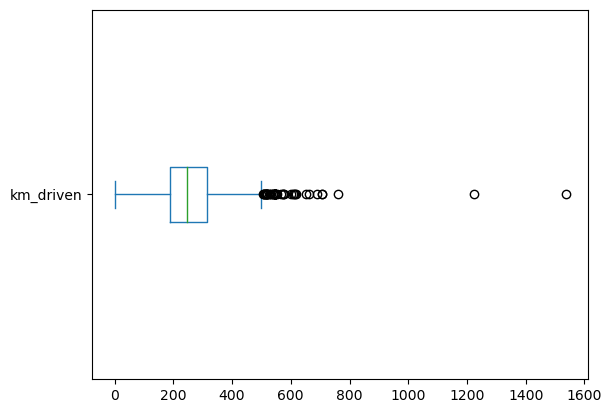

In [39]:
np.sqrt(cardata.km_driven).plot(kind='box',vert=False)
# Logarthmic Transformation moved from positive to negative skewness
# Square Root Transformation failed to transform
# No Transformation can be done on this variable

In [41]:
cardata[['km_driven','mileage', 'engine', 'max_power',
         'torque']].head()
# Different Mathematical units, scaling must be done

,km_driven,mileage,engine,max_power,torque
0,145500,23.40,1248.0,74.00,2000.0
1,120000,21.14,1498.0,103.52,2500.0
2,140000,17.70,1497.0,78.00,2700.0
3,127000,23.00,1396.0,90.00,3000.0
4,120000,16.10,1298.0,88.20,4500.0


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
numeric_scaled=scaler.fit_transform(cardata[['km_driven','mileage', 'engine',
                                             'max_power','torque']])

In [45]:
numeric_scaled=pd.DataFrame(numeric_scaled,columns=['km_driven','mileage', 
                                                    'engine','max_power',
                                                    'torque'])

In [46]:
numeric_scaled.head()

,km_driven,mileage,engine,max_power,torque
0,1.338363,0.999896,-0.411305,-0.488067,-1.211504
1,0.887411,0.432289,0.090536,0.346439,-0.652938
2,1.241098,-0.431678,0.088528,-0.374990,-0.429512
3,1.011202,0.899435,-0.114215,-0.035760,-0.094372
4,0.887411,-0.833524,-0.310937,-0.086645,1.581325


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
minmax=MinMaxScaler()

In [49]:
numeric_minmax=minmax.fit_transform(cardata[['km_driven','mileage', 'engine',
                                             'max_power','torque']])

In [50]:
numeric_minmax=pd.DataFrame(numeric_minmax,columns=['km_driven','mileage', 
                                                    'engine','max_power',
                                                    'torque'])

In [51]:
numeric_minmax.head()

,km_driven,mileage,engine,max_power,torque
0,0.061640,0.557143,0.209396,0.1850,0.070423
1,0.050837,0.503333,0.293289,0.2588,0.093897
2,0.059310,0.421429,0.292953,0.1950,0.103286
3,0.053803,0.547619,0.259060,0.2250,0.117371
4,0.050837,0.383333,0.226174,0.2205,0.187793


In [52]:
from sklearn.preprocessing import RobustScaler

In [53]:
robust=RobustScaler()

In [54]:
numeric_robust=robust.fit_transform(cardata[['km_driven','mileage', 'engine',
                                             'max_power','torque']])

In [55]:
numeric_robust=pd.DataFrame(numeric_robust,columns=['km_driven','mileage', 
                                                    'engine','max_power',
                                                    'torque'])

In [56]:
numeric_robust.head()

,km_driven,mileage,engine,max_power,torque
0,1.357143,0.726831,0.000000,-0.241327,-0.666667
1,0.952381,0.314234,0.649351,0.649170,-0.333333
2,1.269841,-0.313790,0.646753,-0.120664,-0.200000
3,1.063492,0.653805,0.384416,0.241327,0.000000
4,0.952381,-0.605894,0.129870,0.187029,1.000000


In [60]:
# Non Numeric - Categorical data
cardata[['fuel', 'seller_type','transmission', 'owner','seats']].head()
# Dummy Variable Encoding is assigning numerical identifiers to each level/class
# in categorical variable starting from 0 to n levels in alphabetical order

# LabelEncoder() - Assigns numerical identifier from 0 to n levels in same 
# column in alphabetical order.

# pd.get_dummies() - Creates new columns equivalent to as many levels and uses
# binary encoding (Yes-1 & No-0) for each column. 

# OneHotencoder() - similar to pd.get_dummies()

,fuel,seller_type,transmission,owner,seats
0,Diesel,Individual,Manual,First Owner,5.0
1,Diesel,Individual,Manual,Second Owner,5.0
2,Petrol,Individual,Manual,Third Owner,5.0
3,Diesel,Individual,Manual,First Owner,5.0
4,Petrol,Individual,Manual,First Owner,5.0


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
object_encode=cardata[['fuel', 'seller_type','transmission',
                       'owner','seats']].apply(le.fit_transform)

In [64]:
object_encode.head()

,fuel,seller_type,transmission,owner,seats
0,1,1,1,0,2
1,1,1,1,2,2
2,3,1,1,4,2
3,1,1,1,0,2
4,3,1,1,0,2


In [65]:
object_dummy=pd.get_dummies(cardata[['fuel', 'seller_type','transmission',
                       'owner','seats']],columns=['fuel', 'seller_type',
                                                  'transmission','owner',
                                                  'seats'])

In [66]:
object_dummy.head()

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,...,owner_Third Owner,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0
0,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
onehot=OneHotEncoder()

In [77]:
object_onehot=onehot.fit_transform(cardata[['fuel', 'seller_type','transmission',
                                            'owner','seats']])

In [78]:
object_onehot=pd.DataFrame(object_onehot)

In [79]:
object_onehot

,0
0,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
1,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
2,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
3,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
4,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
...,...
8123,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
8124,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
8125,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
8126,"(0, 1)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."


In [80]:
# Create Independent Variables(X) & dependent Variable(y)
y=cardata.selling_price
X=pd.concat([numeric_scaled,object_dummy],axis=1)
# axis=1 is Column Concatenation

In [82]:
# Dependent Variable(y) is numerical, continuos, closer to normal distribution
# with minimum outliers and no missning Values - Regression Model

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
reg=LinearRegression()

In [86]:
regmodel=reg.fit(X,np.log(y))

In [87]:
regmodel.score(X,np.log(y)) # R Square  must be between 0.60-0.95

0.7412592013547482

In [88]:
regmodel.intercept_

13.323020639422143

In [93]:
print(list(zip(X.columns,np.round(regmodel.coef_,2))))

[('km_driven', -0.13), ('mileage', 0.23), ('engine', 0.12), ('max_power', 0.44), ('torque', 0.03), ('fuel_CNG', -0.04), ('fuel_Diesel', 0.13), ('fuel_LPG', -0.07), ('fuel_Petrol', -0.03), ('seller_type_Dealer', 0.02), ('seller_type_Individual', -0.13), ('seller_type_Trustmark Dealer', 0.1), ('transmission_Automatic', 0.17), ('transmission_Manual', -0.17), ('owner_First Owner', 0.11), ('owner_Fourth & Above Owner', -0.49), ('owner_Second Owner', -0.19), ('owner_Test Drive Car', 0.92), ('owner_Third Owner', -0.36), ('seats_2.0', 1.29), ('seats_4.0', -0.87), ('seats_5.0', -0.23), ('seats_6.0', -0.04), ('seats_7.0', 0.08), ('seats_8.0', 0.15), ('seats_9.0', 0.19), ('seats_10.0', -0.03), ('seats_14.0', -0.55)]


In [94]:
regpredict=regmodel.predict(X)

In [96]:
regpredict=np.exp(regpredict)

In [97]:
regresid=y-regpredict

In [98]:
np.sqrt(np.mean(regresid**2)) # Root Mean Square Error

682154.327563695

In [99]:
# Hypothesis Testing _ Comparision of Means/Averages of 2 or more than 2 
# Groups/levels/Classes
# Fundamental Assumption is Means or Averages of Groups/Levels/Classes must be
# different
# To find mean difference and to know how many levels/classes/groups are there
# groupby() must be used

In [101]:
# Test Null Average selling_price of different transmission is equal
np.round(cardata.selling_price.groupby(cardata.transmission).mean(),2)
# leftside of groupby() must be numerical
# rightside of groupby() within brackets must be categorical
# Statistical Function Must be specified

transmission
Automatic    1870827.60
Manual        455425.86
Name: selling_price, dtype: float64

In [102]:
# One Variable is Numerical and Other variable is Categorical with exactly 
# 2 Levels - 2 Sample Independent T test
# Null - There is no Significant difference in Average selling_price of 
# automatic and manual transfmission.
# Alt - There is Significant difference in Average selling_price of 
# automatic and manual transfmission.

# p-value less than 0.05, Reject Null Hypothesis
# p-value greater than 0.05, Fail to Reject Null (Accept) Hypothesis
# 0.05 means 5% Alpha(probable error rate) & 95% Confidence Level

In [103]:
# Split Data
auto=cardata[cardata.transmission=='Automatic']
manual=cardata[cardata.transmission=='Manual']

In [104]:
from scipy.stats import ttest_ind

In [106]:
ttest_ind(auto.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, Reject Null

Ttest_indResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129)

In [107]:
# Test Null Average mileage of Automatic & Manual Cars equal
# groupby(), Null & Alt, Conduct Test & interpret

In [108]:
cardata.mileage.groupby(cardata.transmission).mean()

transmission
Automatic    17.580656
Manual       19.691464
Name: mileage, dtype: float64

In [109]:
cardata.mileage.groupby(cardata.transmission).var()

transmission
Automatic    15.77688
Manual       15.29354
Name: mileage, dtype: float64

In [110]:
ttest_ind(auto.mileage,manual.mileage,equal_var=False)
# Since pvalue=1.5102171268125802e-53 is less than 0.05, Reject Null

Ttest_indResult(statistic=-16.101164712775596, pvalue=1.5102171268125802e-53)

In [111]:
# Test Null Average km_driven for automatic and manual cars equal

In [112]:
cardata.km_driven.groupby(cardata.transmission).mean()

transmission
Automatic    40276.086667
Manual       74202.188895
Name: km_driven, dtype: float64

In [113]:
cardata.km_driven.groupby(cardata.transmission).var()

transmission
Automatic    1.250228e+09
Manual       3.338416e+09
Name: km_driven, dtype: float64

In [114]:
ttest_ind(auto.km_driven,manual.km_driven,equal_var=False)
# Since pvalue=2.851791533885484e-131 is less than 0.05, Reject Null

Ttest_indResult(statistic=-26.31311123939943, pvalue=2.851791533885484e-131)